# 매스미디어 광고 실시의 최적화 문제
* 퍼즐컬렉션은 지금까지 인터넷에서만 광고를 했으나, 유저수를 더욱 늘리기 위해 매스미디어(TV, 잡지) 광고를 하기로 했습니다. 과거에 다른 게임에서 실시했던 데이터를 이용해서 가장 효과적으로 광고를 하고자 합니다. 어떻게 하면 좋을까요? (10군데 정도의 매스미디어 매체와 거래를 하면서, 각 매체에 적어도 3개월에 한 번은 광고를 발주하는 것이 관계유지상 좋으므로 그 방침에 따라 각 매체에 광고를 발주해야함)

## 문제 발견

* 가설
  - 매스미디어 광고의 광고비 배분에 문제가 있음.
      - 매월 TV와 잡지의 광고비 배분에 변동이 있음.


* 타 부서들과 질의응답 결과
  - 마케팅부
   1. 과거의 데이터를 가지고 TV와 잡지 각각의 광고비와 획득 유저수 관계 파악하기
   2. 그 관계성을 이용해서 TV와 잡지에 투입할 광고 배분 결정하기
   
* 중회귀모델 분석 기법
  - 이 기법을 사용하여 다음과 같은 사항을 분석한다.
    1. 원인으로 여겼던 데이터가 결과로 여겼던 데이터에 정말 영향을 끼쳤는가?
      > 광고비(설명변수)가 신규 유저수(목적변수)에 어떻게든 영향을 끼쳤는가?
    2. 만일 영향을 끼쳤다고 하면 그들 사이에는 어떤 관계가 있는가?
    
### 분석 스토리 정리
1. 매스미디어 광고에 의한 신규 유저수가 일정하지 않다.(사실)
2. 신규 유저수가 일정하지 않은 것은 매월 TV 광고와 잡지 광고의 배분이 일정하지 않기 때문일 것이다.(가설)
3. TV, 잡지 각각에 대해 광고비와 신규 유저수의 관계를 파악한다.
4. 그 관계성을 가지고 어떻게 TV와 잡지에 광고를 배분할지 결정한다.

## 데이터 수집과 가공
### 분석에 필요한 데이터 수집

In [38]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
#CSV 파일 읽어 들이기
ad_data = pd.read_csv('ad_result.csv')
ad_data

,month,tvcm,magazine,install
0,Jan-13,63580,59550,53948
1,Feb-13,81760,60690,57300
2,Mar-13,68530,58620,52057
3,Apr-13,52710,52470,44044
4,May-13,64730,63650,54063
5,Jun-13,76820,65550,58097
6,Jul-13,56660,55460,47407
7,Aug-13,66590,60660,53333
8,Sep-13,60660,56460,49918
9,Oct-13,100900,65450,59963


Format	Description	Example
%c	날짜, 요일, 시간을 출력, 현재 시간대 기준	Tue May 4 00:33:26 2021
%x	날짜를 출력, 현재 시간대 기준	05/04/21
%X	시간을 출력, 현재 시간대 기준	00:33:26
%a	요일 줄임말	Sun, Mon, … Sat
%A	요일	Sunday, Monday, …, Saturday
%w	요일을 숫자로 표시, 월~일	0, 1, …, 6
%d	일	01, 02, …, 31
%b	월 줄임말	Jan, Feb, …, Dec
%B	월	January, February, …, December
%m	숫자 월	01, 02, …, 12
%y	두 자릿수 연도	01, 02, …, 99
%Y	네 자릿수 연도	0001, 0002, …, 2017, 2018, 9999
%H	시(24hour)	00, 01, …, 23
%I	시(12hour)	01, 02, …, 12
%p	AM, PM	AM, PM
%M	분	00, 01, …, 59
%S	초	00, 01, …, 59
%Z	시간대	대한민국 표준시
%j	1월 1일부터 경과한 일수	001, 002, …, 366
%U	1년중 주차(월요일이 한 주의 시작)	00, 01, …, 53
%W	1년중 주차(월요일이 한 주의 시작)	00, 01, …, 53

In [39]:
#날짜 형식 변환
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, '%b-%y').strftime('%Y-%m')

ad_data['month'] = ad_data['month'].apply(date_convert)

ad_data['month']

0    2013-01
1    2013-02
2    2013-03
3    2013-04
4    2013-05
5    2013-06
6    2013-07
7    2013-08
8    2013-09
9    2013-10
Name: month, dtype: object

## 데이터 분석

* 그래프로 데이터를 시각화하기
  - TV광고와 잡지 광고 모두 오른쪽 위로 올라가는 모습으로 점들이 찍힌 것을 확인할 수 있으며, 이를 통해 광고비를 늘리면 신규 유저수도 늘어나는. 관계가 있다고 생각할 수 있음


In [40]:
ad_data

,month,tvcm,magazine,install
0,2013-01,63580,59550,53948
1,2013-02,81760,60690,57300
2,2013-03,68530,58620,52057
3,2013-04,52710,52470,44044
4,2013-05,64730,63650,54063
5,2013-06,76820,65550,58097
6,2013-07,56660,55460,47407
7,2013-08,66590,60660,53333
8,2013-09,60660,56460,49918
9,2013-10,100900,65450,59963


## 데이터 분석

* 그래프로 데이터를 시각화하기



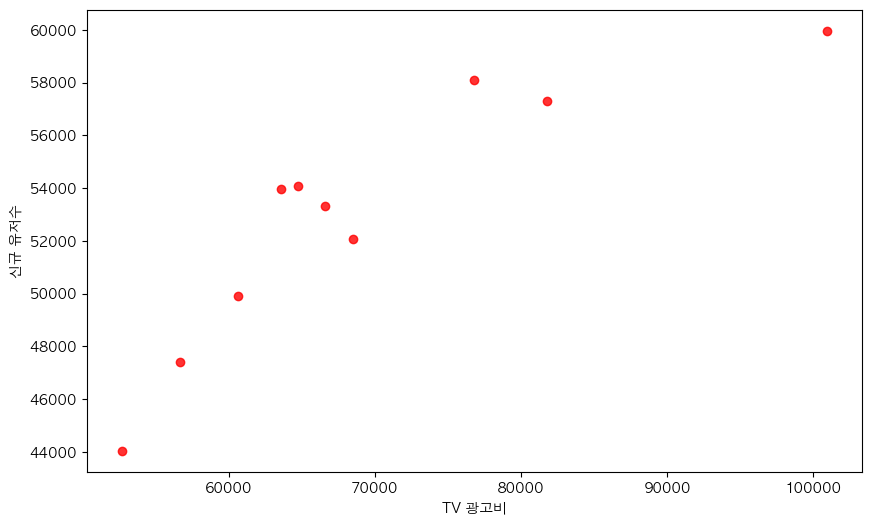

In [54]:
#TV광고의 광고비용과 신규 유저수의 산점도 그리기
import matplotlib.pyplot as plt
#한글깨짐처리
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
plt.figure(figsize=(10,6))

# x축, y축에 들어갈 데이터 column 순서대로 지정
plt.scatter(ad_data['tvcm'], ad_data['install'], c = 'red', alpha = 0.8)

plt.xlabel('TV 광고비', size = 10)
plt.ylabel('신규 유저수', size = 10)

plt.show()

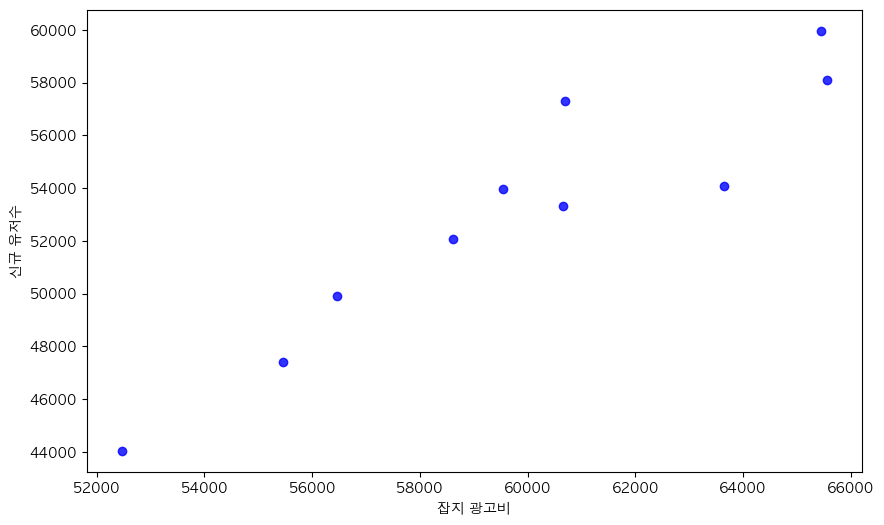

In [55]:
plt.figure(figsize=(10,6))
# x축, y축에 들어갈 데이터 column 순서대로 지정
plt.scatter(ad_data['magazine'], ad_data['install'], c = 'blue', alpha = 0.8)

plt.xlabel('잡지 광고비', size = 10)
plt.ylabel('신규 유저수', size = 10)

plt.show()

### 회귀분석 실행

In [63]:
from statsmodels.formula.api import ols
result = ols('install ~ tvcm + magazine',data=ad_data).fit()

In [62]:
result.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                install   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.86
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           5.97e-05
Time:                        10:39:57   Log-Likelihood:                -84.758
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       7   BIC:                             176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.1743   7719.131      0.024      0.981   -1.81e+04    1.84e+04
tvcm           0.1361      0.052      2.630      0.034       0.014       0.258
magazine       0.7250      0.169      4.283      0.004       0.325       1.125
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.795
Skew:                           0.534   Prob(JB):                        0.672
Kurtosis:                       2.124   Cond. No.                     1.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 회귀분석의 결과 해석
* 신규 유저수 = 0.136 * TV 광고비 + 0.725 * 잡지 광고비 + 188.174이라는 관계가 있으며, 신규 유저는 광고를 실시하지 않을 때 월 188명 정도임을 알 수 있고, TV 광고에 1(1만원)을 투입하면 약 0.1명의 신규 유저를, 잡지 광고에 1을 투입하면 약 0.7명의 신규 유저를 획득할 수 있음을 알 수 있다.
* 즉, 잡지 광고가 TV 광고보다 훨씬 효율적으로 유저를 획득할 수 있다.

#### 더 자세한 정보
* Residuals : 잔차(예측값과 측정값의 차이)분포를 사분위수로 표현한 것으로, 데이터의 치우침이 있는지 확인할 수 있음
* Coefficients : 추정된 절편과 기울기에 관한 개요. 각 행은 추정값, 표준오차, t값, p값 순으로 나열되어 있으며 기울기가 얼마나 변동하는지, 통계적 유의성이 있는지 알 수 있음
* Multiple R-squared, Adjusted R-squared : 결정계수와 자유도 조정 결정계수로 결정계수는 1에 가까워 질수록 모델이 주어진 데이터에 적합함을 뜻함

## 데이터 분석 결론
* 결정계수와 자유도 조정 결정계수
  - 결정계수:0.938 자유도 조정 결정계수:0.92
* 잔차분포를 보면, 1Q(제1사분위수)의 절대값이 3Q(제3사분위수)의 절대값보다 커서 분포에 약간의 치우침이 있어 보이지만, 자유도 결정계수가 0.92로 여전히 높기 때문에, 광고 전략을 위한 의사결정에는 문제가 없어 보임

## 액션
> 데이터 분석 결과 TV 광고보다 잡지 광고가 광고효과가 높다는 것을 알 수 있다. 얼핏 보면 TV 광고를 버리고 잡지 광고만 해도 좋을 것 같지만 이 회귀식은 어디까지나 이번에 얻은 데이터만으로 산출한 것임을 잊지 말아야 한다. 데이터의 범위를 넘어선 값이 회귀식에 들어맞지 않는 일은 흔히 있을 수 있기때문. 또한 첫 부분에서 밝혔듯이 각 광고매체와 원만한 관계를 유지하기 위해 적어도 3개월에 한 번은 광고 발주를 해야한다.

* 결과적으로 다음과 같이 광고를 배분하기로 함
  - TV 광고 : 42000(만원), 잡지 광고 : 75000(만원)
* 그 결과 다음 식에 따라 대략 55,000명의 신규 유저를 획득할 수 있다는 전망을 내놓을 수 있었음
  - 54,563명 = 0.136 * 42000(만원) + 0.725 * 75000(만원) + 188.174

## 정리
#### 회귀분석을 통한 데이터 분석
>비용이 많이 드는 부분에서 가장 효율이 높아지도록 비용 최적화를 도모했음. 특별히 비용이 큰 곳을 주목해서 조금이라도 비용 대비 효과가 높아지도록 하면, 비지니스에서는 전체적으로 큰 효과를 얻을 수 있다. 이때 회귀분석 등을 활용해서 어떤 액션에 얼마나 공을 들이면 좋을지 분석해야 한다. 또한 이런 분석에서는 사전에 결과를 짐작할 수 있는 경우가 많으므로, 액션에 막대한 비용이 드는 문제일 경우에는 반드시 실시해야 하는 분석임.